In [1]:
from sklearn.cluster import SpectralClustering,SpectralBiclustering,SpectralCoclustering
from sklearn.metrics import (silhouette_score, davies_bouldin_score, calinski_harabasz_score,)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#this is for ignore all warnings 
import warnings
warnings.filterwarnings('ignore')

In [4]:
data=pd.read_csv('data.csv')
data

,X,Y
0,516.012706,393.014514
1,436.211762,408.656585
2,512.052601,372.022014
3,489.140464,401.807159
4,446.207986,338.516682
...,...,...
331,638.916471,323.569096
332,542.005901,347.527070
333,611.964612,377.254978
334,520.654168,455.996453


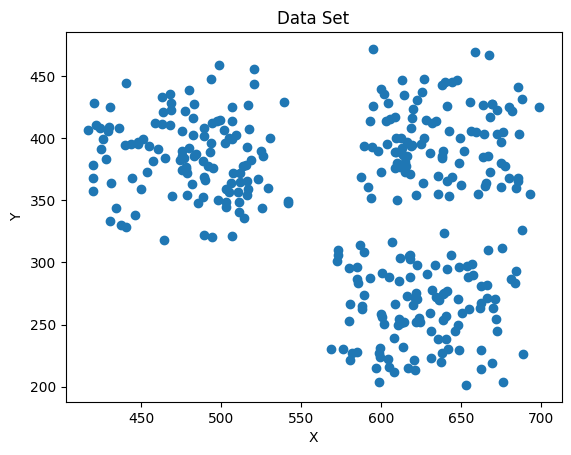

In [5]:
#plot the dataset
plt.scatter(data['X'],data['Y'])
plt.title('Data Set')
plt.ylabel('Y')
plt.xlabel('X')
plt.show()

##### Spectral Clustering
- Description: 
Spectral Clustering is an algorithm used for clustering data based on the eigenvalues (spectral) of a similarity matrix derived from the data. It involves three main steps: constructing a similarity matrix (often using a Gaussian kernel or k-nearest neighbors), computing the Laplacian matrix of this similarity graph, and then performing eigenvalue decomposition on the Laplacian. The algorithm selects the top k eigenvectors to form a new matrix, which is then used to cluster the data using k-means or another clustering method. Spectral Clustering is particularly useful for detecting non-convex clusters and is effective in high-dimensional spaces.


In [6]:
# initialize and fit the spectral clustering model in this example we will use different kernels and try to find the best one
def best_kernel(kernels:tuple)->dict:
    result = {}
    for kernel in kernels:
        spectral = SpectralClustering(n_clusters=3,affinity =kernel,random_state=0)
        cluster_labels=spectral.fit_predict(data)
        silhouette = round(silhouette_score(data, cluster_labels),4)
        davies_bouldin = round(davies_bouldin_score(data, cluster_labels),4)
        calinski_harabasz = round(calinski_harabasz_score(data, cluster_labels),4)
        result[kernel]=[silhouette,davies_bouldin,calinski_harabasz]
    return result
 


In [7]:
results = best_kernel(('nearest_neighbors', 'rbf', 'sigmoid', 'poly', 'linear', 'cosine'))

In [8]:
# convert dictionary to dataframe
pd.DataFrame(results,index=["silhouette","davies_bouldin","calinski_harabasz"])

,nearest_neighbors,rbf,sigmoid,poly,linear,cosine
silhouette,0.6111,0.0365,-0.2192,0.2100,0.2100,0.1034
davies_bouldin,0.5504,0.8437,9.7052,0.8003,0.8003,0.8681
calinski_harabasz,785.9318,1.2574,0.7899,150.1086,150.1086,148.9311


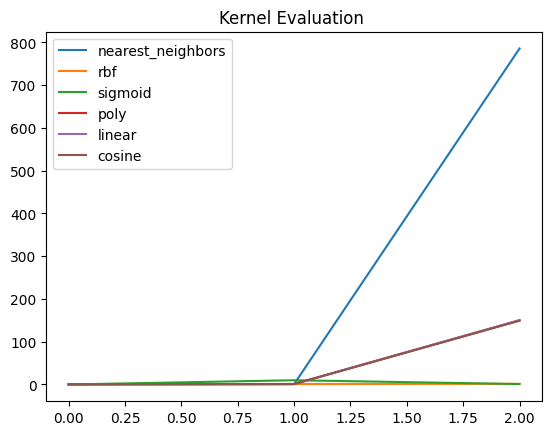

In [9]:
# lets plot the results
plt.plot(results['nearest_neighbors'],label='nearest_neighbors')
plt.plot(results['rbf'],label='rbf')
plt.plot(results['sigmoid'],label='sigmoid')
plt.plot(results['poly'],label='poly')
plt.plot(results['linear'],label='linear')
plt.plot(results['cosine'],label='cosine')
plt.title('Kernel Evaluation ')
plt.legend()
plt.show()


In [10]:
# based on the results the best kernel is "nearest_neighbors"

spectral = SpectralClustering(n_clusters=3,affinity = 'nearest_neighbors',random_state=0)   
cluster_labels=spectral.fit_predict(data)
print("the best silhouette_score =", round(silhouette_score(data, cluster_labels),4))
print("the best davies_bouldin_score =", round(davies_bouldin_score(data, cluster_labels),4))
print("the best calinski_harabasz_score =", round(calinski_harabasz_score(data, cluster_labels),4))


the best silhouette_score = 0.6111
the best davies_bouldin_score = 0.5504
the best calinski_harabasz_score = 785.9318


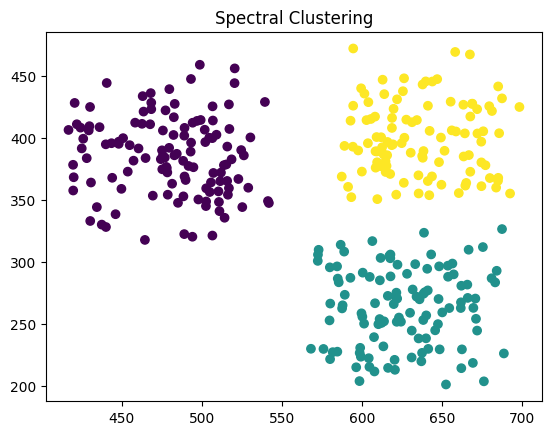

In [11]:
# plot the clusters
plt.scatter(data['X'], data['Y'], c=cluster_labels)
plt.title('Spectral Clustering')
plt.show()

##### Spectral Biclustering

- Description: Spectral Biclustering is a clustering algorithm designed to simultaneously cluster rows and columns of a data matrix. It is particularly useful for finding submatrices (or biclusters) where rows and columns are both similarly related. The algorithm transforms the original data matrix into a new space using singular value decomposition (SVD), enabling the identification of patterns that are not visible in the original space. Spectral Biclustering is often applied in fields like gene expression analysis, where it can identify groups of genes and conditions that exhibit similar behaviors. This method enhances the ability to discover meaningful and coherent clusters in complex datasets.

In [12]:
# initialize and fit the spectral biclustering model in this example we will use different methods and try to find the best one
# this algorithm used n_clusters as tuple 
def best_method(methods:tuple)->dict:
    result = {}
    for method in methods:
        spectral_bicluster = SpectralBiclustering(n_clusters=(3,2),method=method,random_state=0)
        spectral_bicluster.fit(data)
        silhouette = round(silhouette_score(data, spectral_bicluster.row_labels_),4)
        davies_bouldin = round(davies_bouldin_score(data, spectral_bicluster.row_labels_),4)
        calinski_harabasz = round(calinski_harabasz_score(data, spectral_bicluster.row_labels_),4)
        result[method]=[silhouette,davies_bouldin,calinski_harabasz]
    return result

In [13]:
results=best_method(('log',"bistochastic","scale"))

In [14]:
# convert dictionary to dataframe
pd.DataFrame(results,index=["silhouette","davies_bouldin","calinski_harabasz"])

,log,bistochastic,scale
silhouette,0.6113,0.5018,0.4652
davies_bouldin,0.5513,0.7272,0.7832
calinski_harabasz,786.0711,501.1086,425.8948


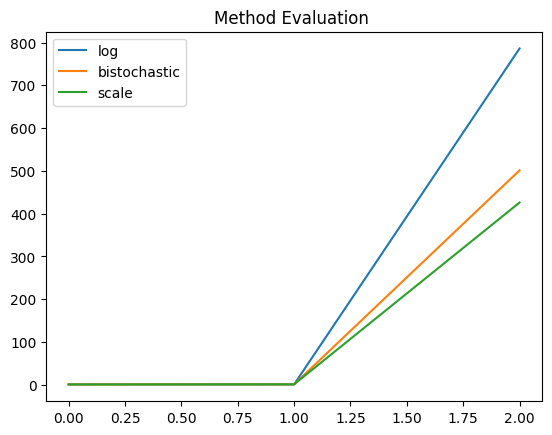

In [15]:
plt.plot(results['log'],label='log')
plt.plot(results['bistochastic'],label='bistochastic')
plt.plot(results['scale'],label='scale')
plt.title('Method Evaluation ')
plt.legend()
plt.show()

In [16]:
# the best method is 'log'
spectral_bicluster = SpectralBiclustering(n_clusters=(3,2),method="log",random_state=0)
spectral_bicluster.fit(data)
print("the best silhouette_score =", round(silhouette_score(data, spectral_bicluster.row_labels_),4))
print("the best davies_bouldin_score =", round(davies_bouldin_score(data, spectral_bicluster.row_labels_),4))
print("the best calinski_harabasz_score =", round(calinski_harabasz_score(data, spectral_bicluster.row_labels_),4))

the best silhouette_score = 0.6113
the best davies_bouldin_score = 0.5513
the best calinski_harabasz_score = 786.0711


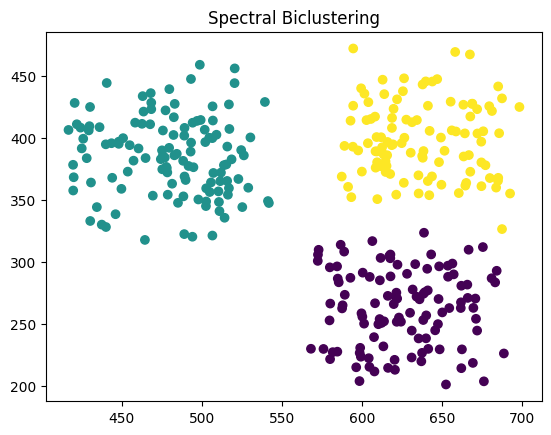

In [17]:
plt.title('Spectral Biclustering')
plt.scatter(data['X'], data['Y'], c=spectral_bicluster.row_labels_)
plt.show()